In [23]:
!rm /kaggle/working/*

In [24]:
import pandas as pd
import numpy as np

Bước 0: Tiền xử lý dữ liệu

In [25]:
df = pd.read_csv('/kaggle/input/odap-fraud-detection/User0_credit_card_transactions.csv')

# Lưu ý: Cần chuyển về string trước để replace, phòng trường hợp lỗi format
df['Amount_USD'] = df['Amount'].astype(str).str.replace('$', '', regex=False)
df['Amount_USD'] = pd.to_numeric(df['Amount_USD'], errors='coerce').abs()

Bước 1: Chọn feature để phân hành vi có sẵn trong file, ở đây ta sẽ sử dụng các đặc trưng:
* Amount
* Use Chip
* Hour (từ Time)
* Errors?
* Merchant category (MCC)

In [26]:
df["hour"] = df["Time"].str[:2].astype(int)
df["is_error"] = df["Errors?"].notna().astype(int)
df["is_fraud"] = (df["Is Fraud?"] == "Yes").astype(int)
df["chip"] = (df["Use Chip"] == "Yes").astype(int)

Bước 2: Tạo các feature số

In [27]:
df["hour"] = df["Time"].str[:2].astype(int)
df["is_error"] = df["Errors?"].notna().astype(int)
df["is_fraud"] = (df["Is Fraud?"] == "Yes").astype(int)
df["chip"] = (df["Use Chip"] == "Yes").astype(int)


Bước 3: Cluster → tạo pseudo-users

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

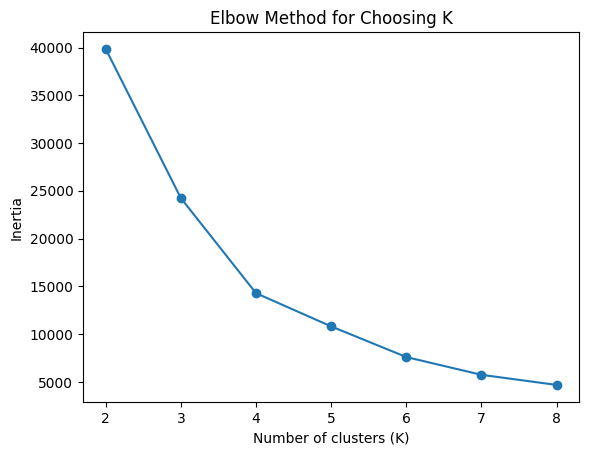

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

features = df[["Amount_USD", "hour", "chip", "is_error"]]

X = StandardScaler().fit_transform(features)
inertia = []
K = range(2, 9)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Choosing K")
plt.show()


In [29]:
kmeans = KMeans(n_clusters=4, random_state=42)
df["pseudo_user"] = kmeans.fit_predict(X)
df.to_csv("User0_credit_card_transactions.csv", index=False)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
